### __Introduction__
#### _What is Exploratory Data Analysis ?_

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

#### _How to perform Exploratory Data Analysis ?_

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this work we can understand some common methods and plots that would be used in the EDA process.

#### _What data are we exploring today ?_

To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more.

### 1. Library import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('ggplot')

### 2. Dataset read

We need to read the dataset in order to demonstrate some EDA on data.

In [2]:
df = pd.read_csv("./data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.00,6.00,MANUAL,rear wheel drive,2.00,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,Luxury,Compact,Convertible,28,18,3916,34500


### 3. Checking dataset characteristics

In [3]:
df.shape

(11914, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Dataset Column Descriptions

| Column            |  Description |
|-------------------|--------------|
| Make              |  Car Make |
| Model             |  Car Model |
| Year              |  Car Year (Marketing)
| Engine Fuel Type  |  Engine Fuel Type
| Engine HP         |  Engine Horse Power (HP) |
| Engine Cylinders  |  Engine Cylinders |
| Transmission Type |  Transmission Type |
| Driven_Wheels     |  Driven Wheels |
| Number of Doors   |  Number of Doors |
| Market Category   |  Market Category |
| Vehicle Size      |  Size of Vehicle |
| Vehicle Style     |  Type of Vehicle |
| highway MPG       |  Highway MPG |
| city mpg          |  City MPG |
| Popularity        |  Popularity (Twitter) |
| MSRP              |  Manufacturer Suggested Retail Price |

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.00,2010.38,7.58,1990.00,2007.00,2015.00,2016.00,2017.00
Engine HP,11845.00,249.39,109.19,55.00,170.00,227.00,300.00,1001.00
Engine Cylinders,11884.00,5.63,1.78,0.00,4.00,6.00,6.00,16.00
Number of Doors,11908.00,3.44,0.88,2.00,2.00,4.00,4.00,4.00
highway MPG,11914.00,26.64,8.86,12.00,22.00,26.00,30.00,354.00
city mpg,11914.00,19.73,8.99,7.00,16.00,18.00,22.00,137.00
Popularity,11914.00,1554.91,1441.86,2.00,549.00,1385.00,2009.00,5657.00
MSRP,11914.00,40594.74,60109.10,2000.00,21000.00,29995.00,42231.25,2065902.00


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Make,11914,48,Chevrolet,1123
Model,11914,915,Silverado 1500,156
Engine Fuel Type,11911,10,regular unleaded,7172
Transmission Type,11914,5,AUTOMATIC,8266
Driven_Wheels,11914,4,front wheel drive,4787
Market Category,8172,71,Crossover,1110
Vehicle Size,11914,3,Compact,4764
Vehicle Style,11914,16,Sedan,3048


Changing column names for better understanding.

In [7]:
df = df.rename(columns={"highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

In [8]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'MPG-H', 'MPG-C', 'Popularity', 'Price'],
      dtype='object')

### 4. Checking duplicated rows and missing values

In [9]:
df.duplicated().sum()

715

In [10]:
df[df.duplicated()].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.00,6.00,MANUAL,front wheel drive,4.00,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.00,6.00,MANUAL,front wheel drive,4.00,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.00,6.00,MANUAL,front wheel drive,4.00,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.00,6.00,MANUAL,front wheel drive,4.00,Luxury,Midsize,Sedan,24,17,3105,2000


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
MPG-H                   0
MPG-C                   0
Popularity              0
Price                   0
dtype: int64

<AxesSubplot:>

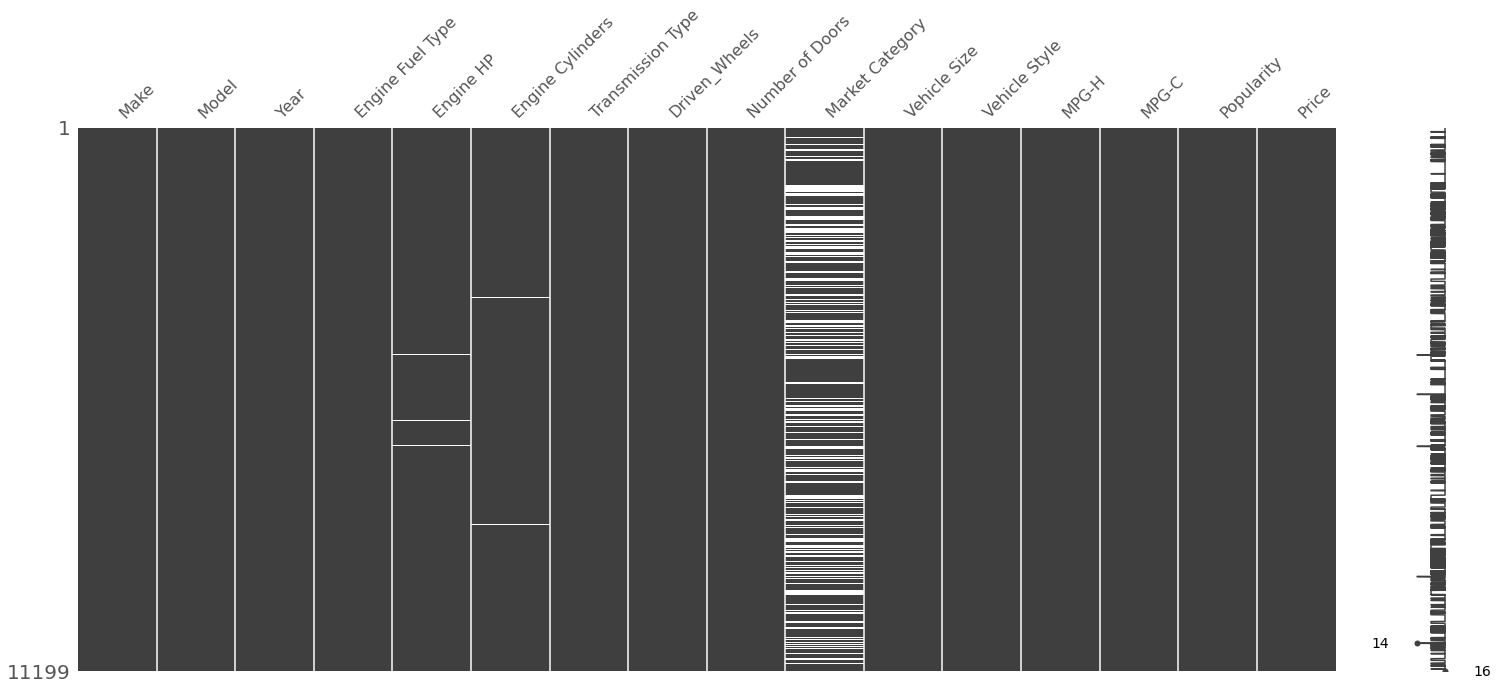

In [13]:
msno.matrix(df)

Missing values can be filled with mean or median or mode values. Checking distribution is good for choosing which one to use. (Eg. skewed distribution -> median is more proper.)

### 5. Some visualizations on dataset

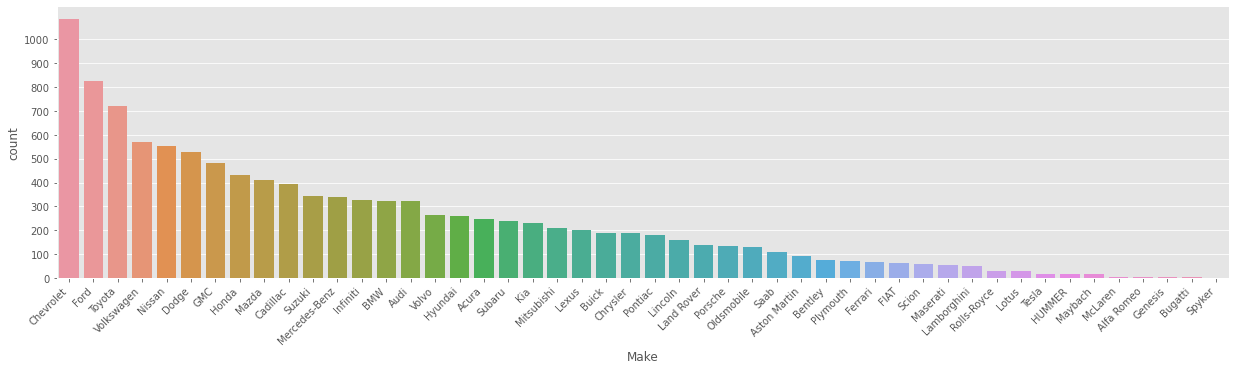

In [14]:
plt.rcParams["figure.figsize"] = (21, 5)
plt.xticks(rotation=45, ha="right")
plt.yticks(range(0, 1100, 100))
sns.countplot(x="Make", order=df.Make.value_counts().sort_values(ascending=False).index, data=df)
plt.show()

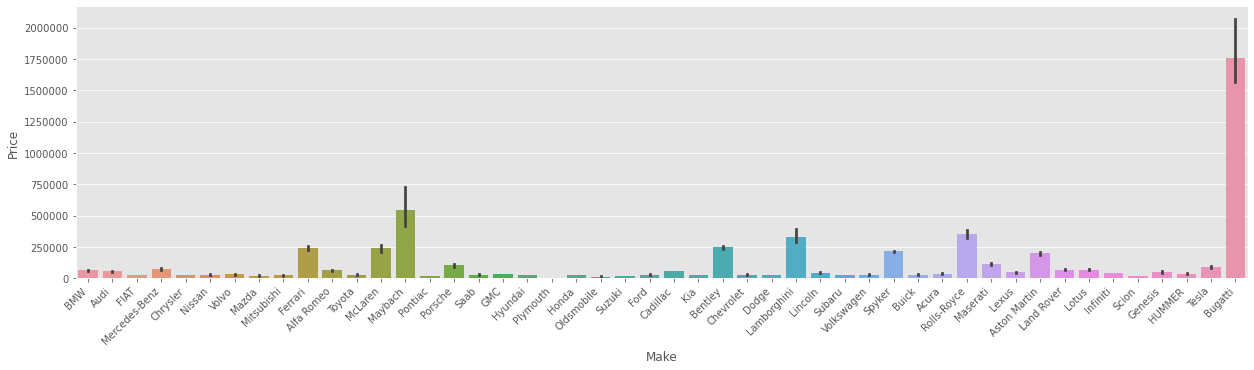

In [15]:
plt.xticks(rotation=45, ha="right")
plt.ticklabel_format(style="plain", axis="y")
sns.barplot(x="Make", y="Price", data=df)
plt.show()

In [16]:
df.Price.describe().T

count     11199.00
mean      41925.93
std       61535.05
min        2000.00
25%       21599.50
50%       30675.00
75%       43032.50
max     2065902.00
Name: Price, dtype: float64

In [17]:
df[df["Price"]<= 21599].shape

(2800, 16)

In [18]:
px.histogram(df["Price"])

In [19]:
fig = px.box(df, x = df['Price'])
fig.update_traces(fillcolor = '#C9A26B')
fig.update_layout(
    xaxis=dict(
        range=[-10000, 80000],  # Setting the range to emphasize the gap between 0 and 75000
        tickmode='array',
        tickvals=[0, 75000, 400000, 2100000]  # Setting specific tick values
    )
)

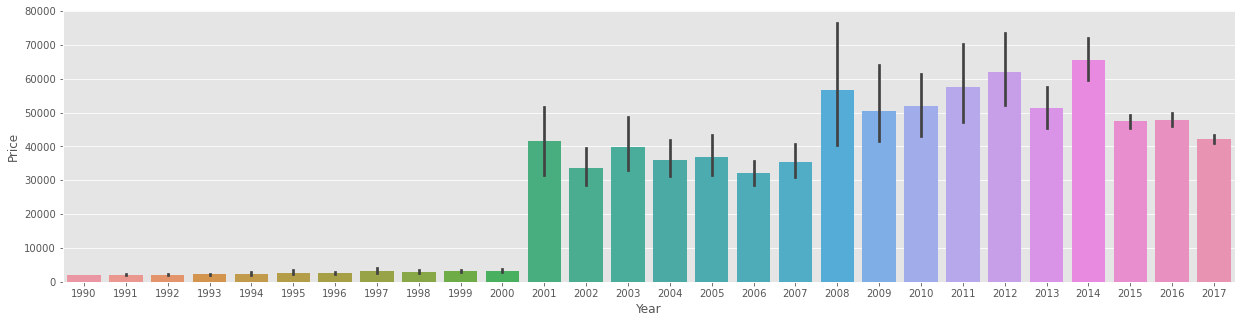

In [20]:
sns.barplot(x="Year", y="Price", data=df);

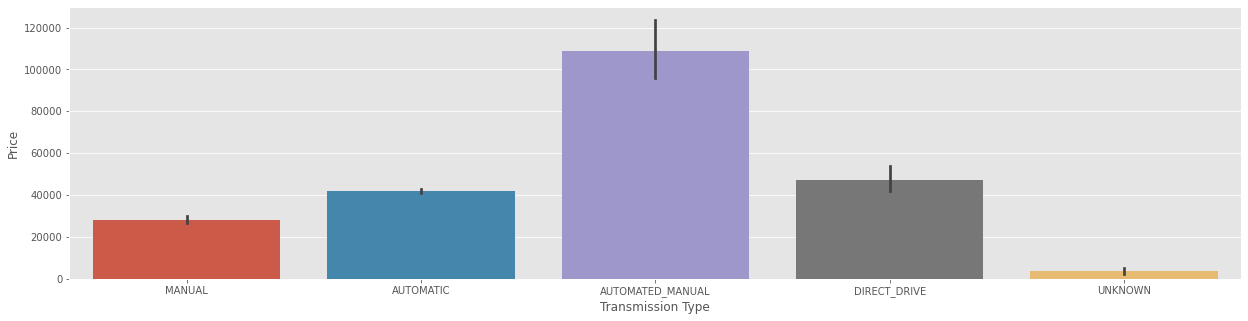

In [21]:
sns.barplot(x="Transmission Type", y="Price", data=df);

<AxesSubplot:xlabel='MPG-H', ylabel='MPG-C'>

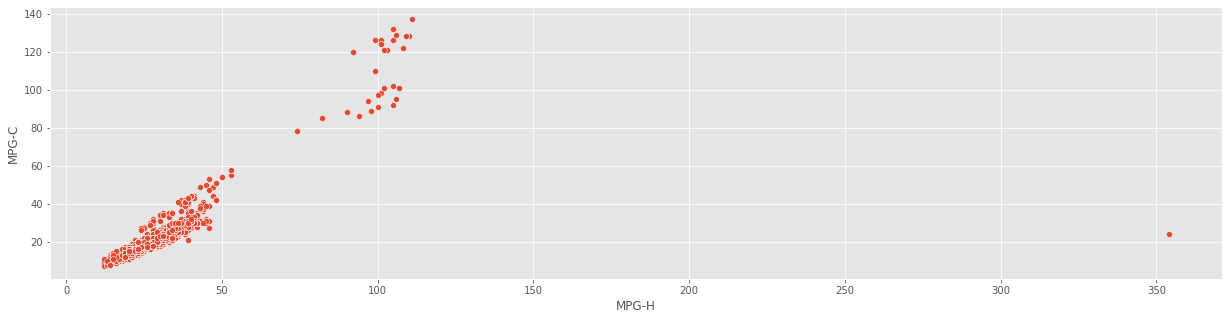

In [22]:
sns.scatterplot(x="MPG-H", y="MPG-C", data=df)

<AxesSubplot:xlabel='MPG-H'>

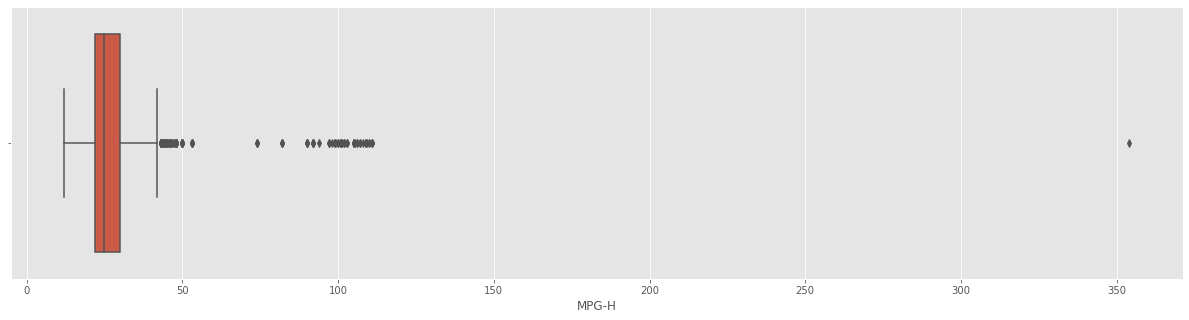

In [23]:
sns.boxplot(x="MPG-H", data=df)

In [24]:
df[df["MPG-H"]>350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
1119,Audi,A6,2017,premium unleaded (recommended),252.00,4.00,AUTOMATED_MANUAL,front wheel drive,4.00,Luxury,Midsize,Sedan,354,24,3105,51600


In [25]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
MPG-H                  59
MPG-C                  69
Popularity             48
Price                6049
dtype: int64

<AxesSubplot:>

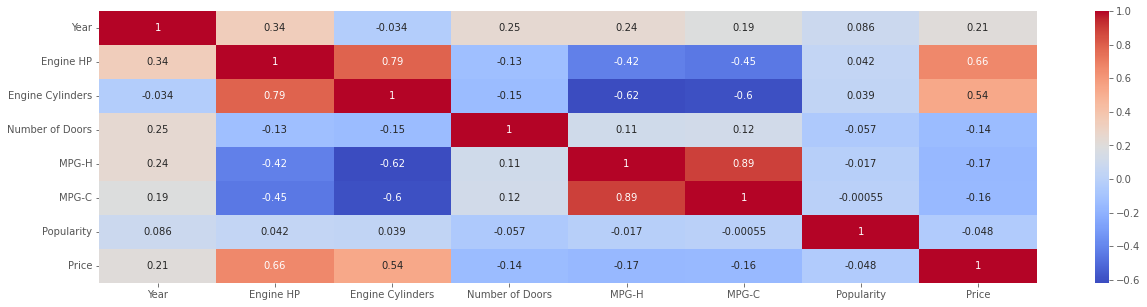

In [26]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

<AxesSubplot:xlabel='Price', ylabel='Engine HP'>

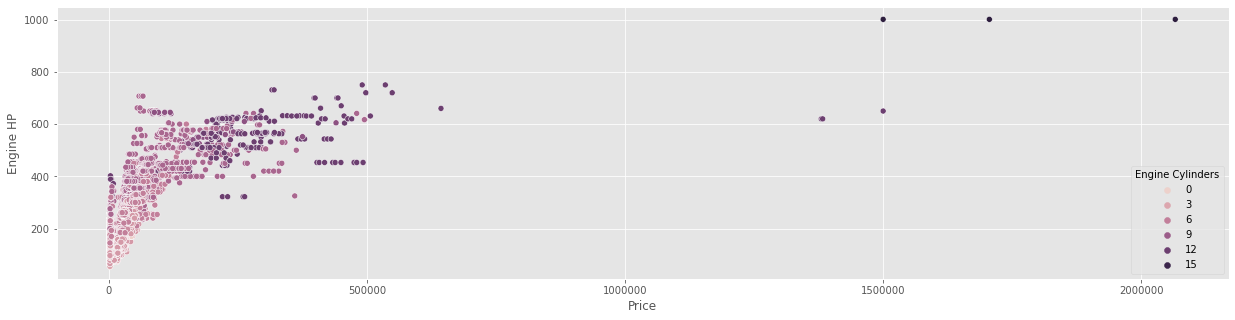

In [27]:
plt.ticklabel_format(style="plain", axis="x")
sns.scatterplot(x="Price", y="Engine HP", hue="Engine Cylinders", data=df)

<AxesSubplot:xlabel='Engine Fuel Type', ylabel='Price'>

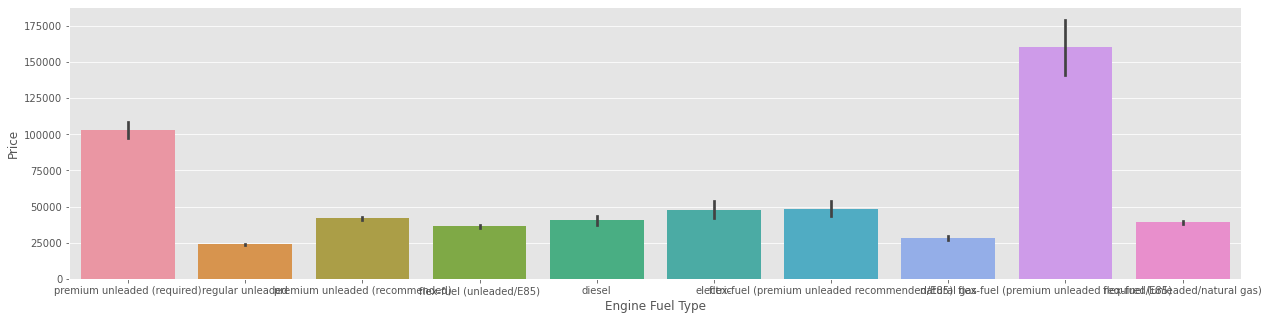

In [28]:

sns.barplot(x= "Engine Fuel Type", y="Price", data=df)

<AxesSubplot:xlabel='Make', ylabel='Price'>

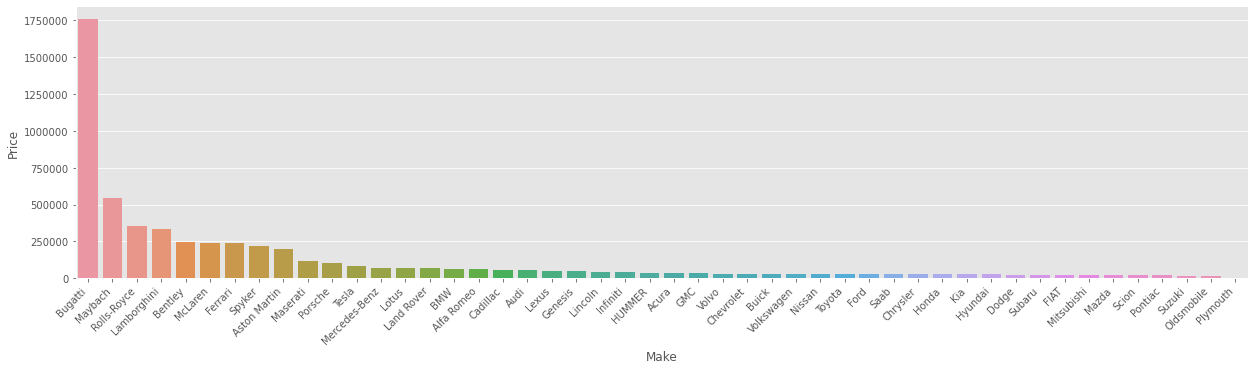

In [29]:
df_make_mean = pd.DataFrame(df.groupby("Make")["Price"].mean()).sort_values(by="Price", ascending=False).reset_index()
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45, ha="right")
sns.barplot(x="Make", y="Price",data=df_make_mean)

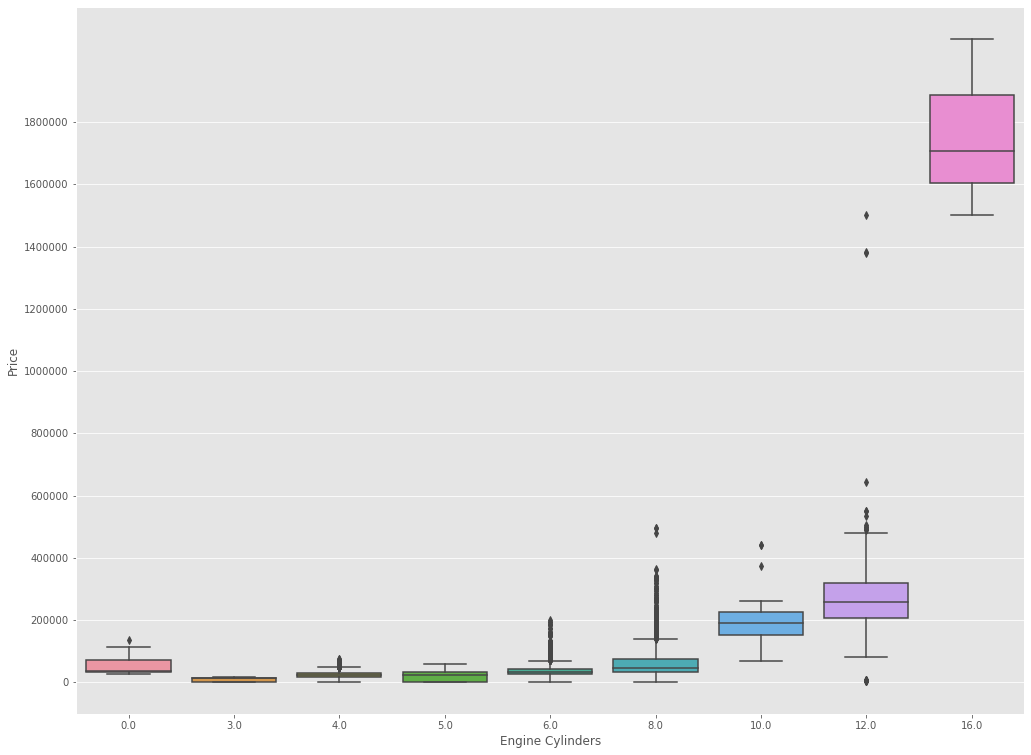

In [37]:
plt.figure(figsize=(17,13))
plt.ticklabel_format(style="plain", axis="y")
plt.yticks(range(0,2000000, 200000))
sns.boxplot(x="Engine Cylinders", y="Price", data=df);



In [31]:
px.box(df, x = df["Engine Cylinders"], y=df["Price"])



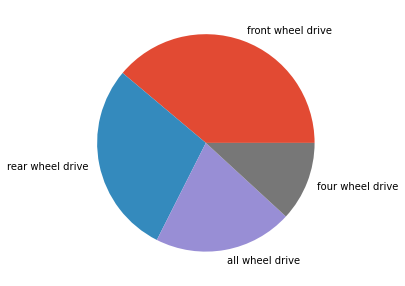

In [32]:
df_transmission_counts = df["Driven_Wheels"].value_counts()

plt.pie(df_transmission_counts, labels=df_transmission_counts.index)
plt.show()

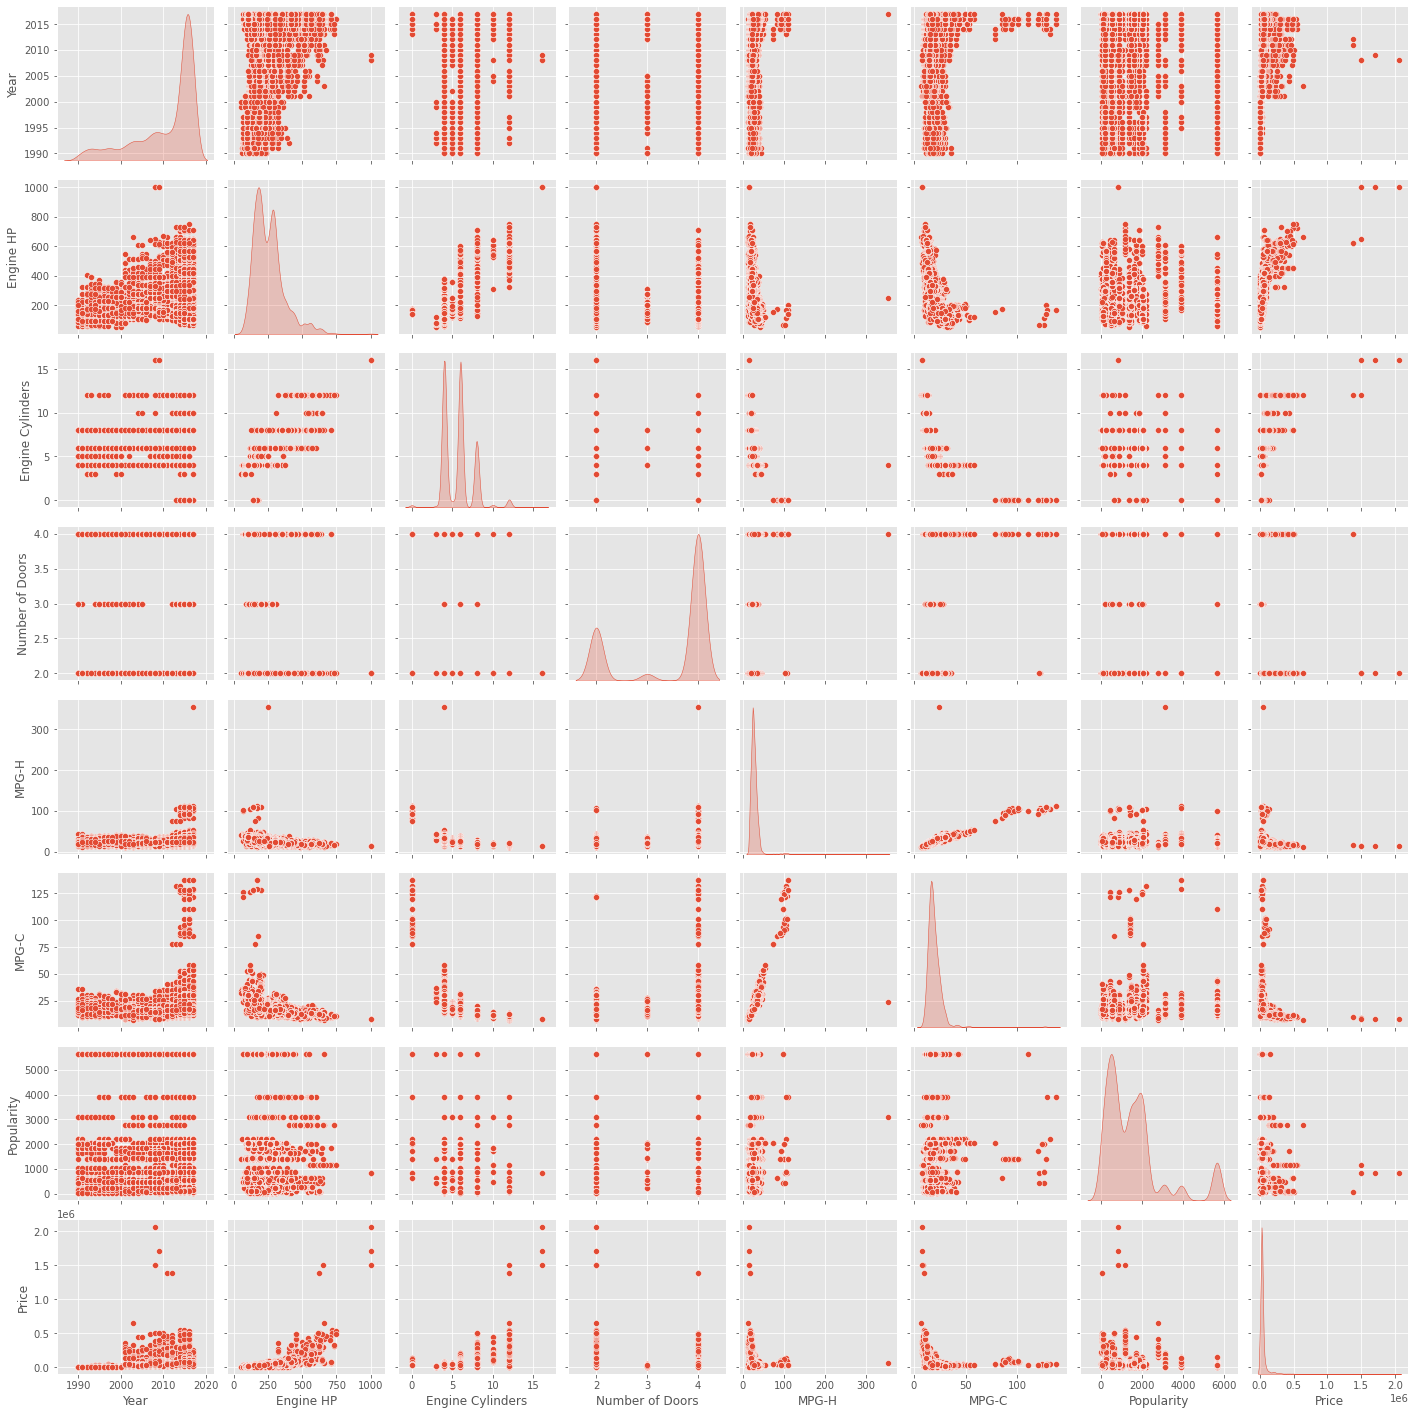

In [33]:
sns.pairplot(data=df, kind="scatter", diag_kind="kde")

<AxesSubplot:xlabel='Vehicle Style', ylabel='Popularity'>

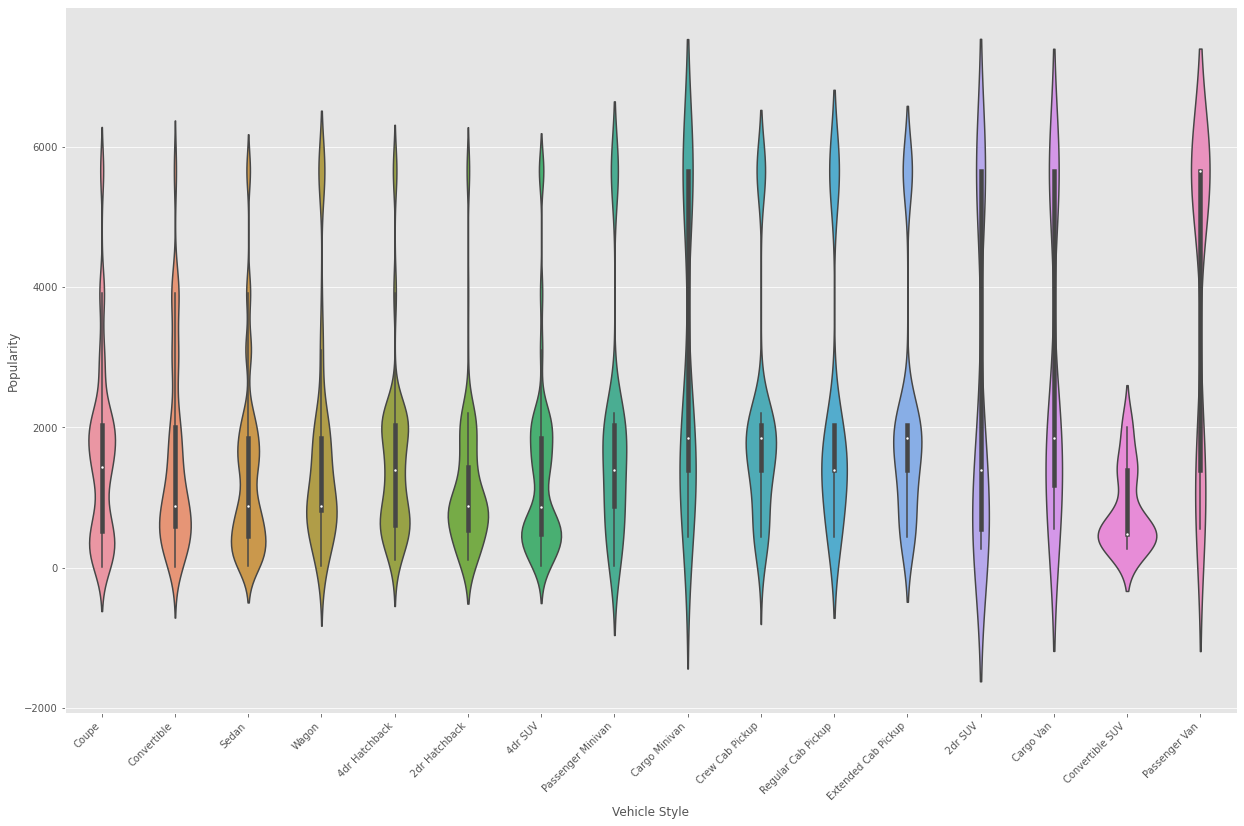

In [34]:
plt.figure(figsize=(21,13))
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45, ha="right")
sns.violinplot(x="Vehicle Style", y="Popularity", data=df)

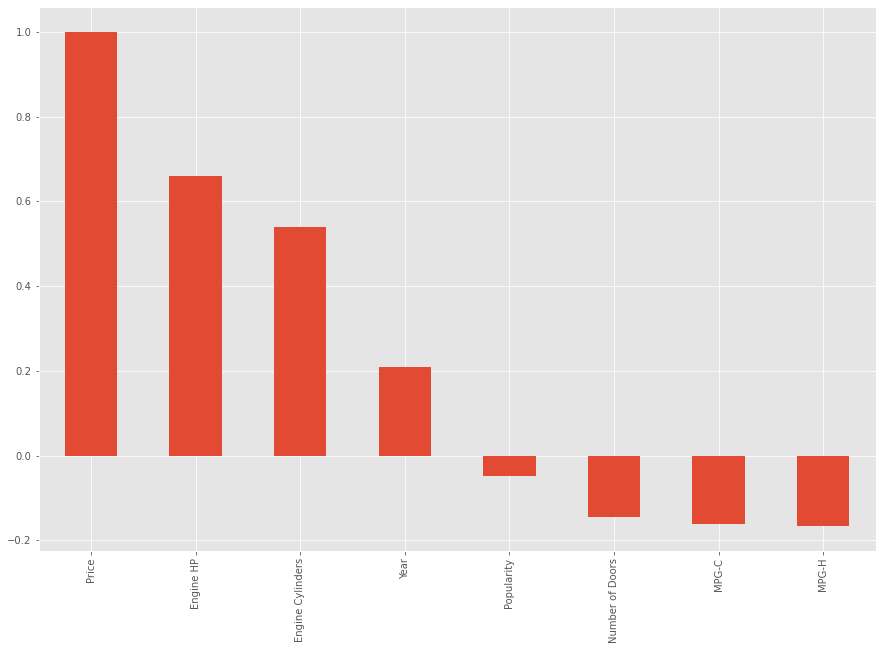

In [35]:
plt.figure(figsize=(15,10))
df.corr()['Price'].sort_values(ascending=False).plot(kind='bar');